# Исследование признаков

In [1]:
import pandas as pd
from eda_utils import *

pd.set_option('display.max_columns', 30)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,B001,P,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


### Общая информация

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

### Описательные статистики

In [4]:
num_features = train.select_dtypes(include='float').columns.tolist()
describe_with_mode(train, num_features)

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000
nunique,4.000000,5.010000e+03,3245.000000,196.000000,6.000000,72.000000,2179.000000
mode,4.000000,2.500000e+03,0.000000,10000.000000,5.000000,20.000000,372.000000


In [5]:
train.describe(include=object)

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category
count,69713,69713,69698,69713,68899,68899,65695,65695,60322,60322,69713,69713,69713
unique,69713,2,10759,92,678,3,36617,3,57,2,2,29,7
top,APPC90493171225,Male,11/01/82,02/09/16,C10001,A,COM0000002,A,B001,P,Y,S122,B
freq,1,39949,253,1838,10007,49885,457,33336,14197,39619,45275,30941,29812


### Пропущенные значения

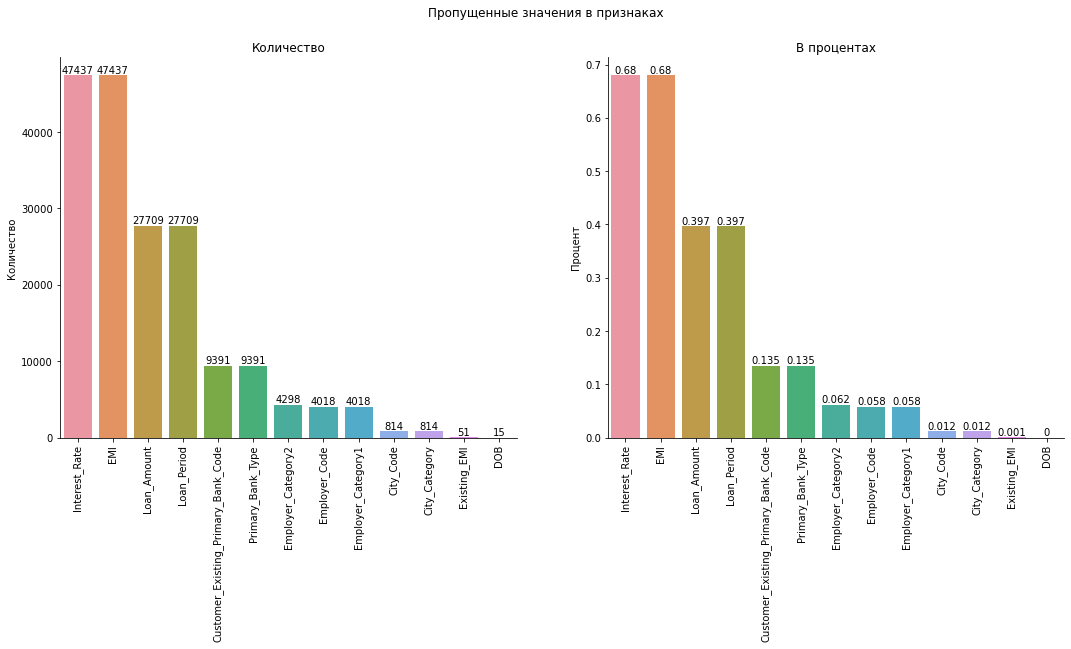

In [6]:
plot_nulls(train)

### Распределение целевой переменной

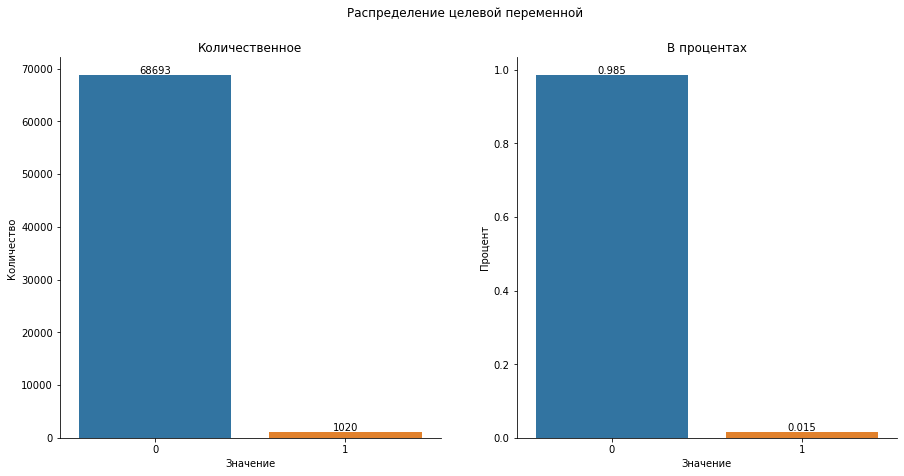

In [7]:
plot_target_distribution(train, 'Approved')

*  в целевой переменной заметен сильный дисбаланс классов

### Корреляция признаков

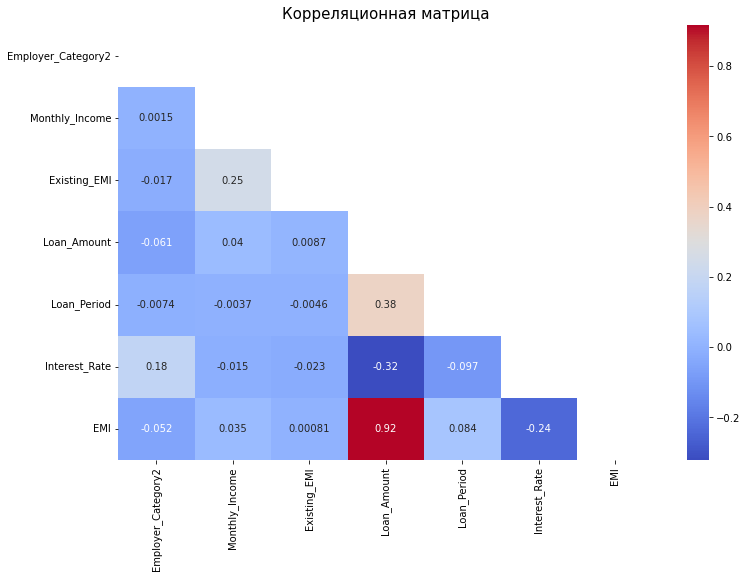

In [8]:
num_features = train.select_dtypes(include='float').columns.tolist()
plot_correlation(train, columns=num_features)

*  месячный платеж по запрошенной сумме кредита (EMI) и запрошенная сумма кредита сильно коррелируют

### Категориальные признаки

In [9]:
categorical_features = [
    'Gender', 'City_Category', 'Employer_Category1', 'Primary_Bank_Type',
    'Contacted', 'Source_Category', 'Employer_Category2', 'Loan_Period',
    'Var1', 'Loan_Period'
]

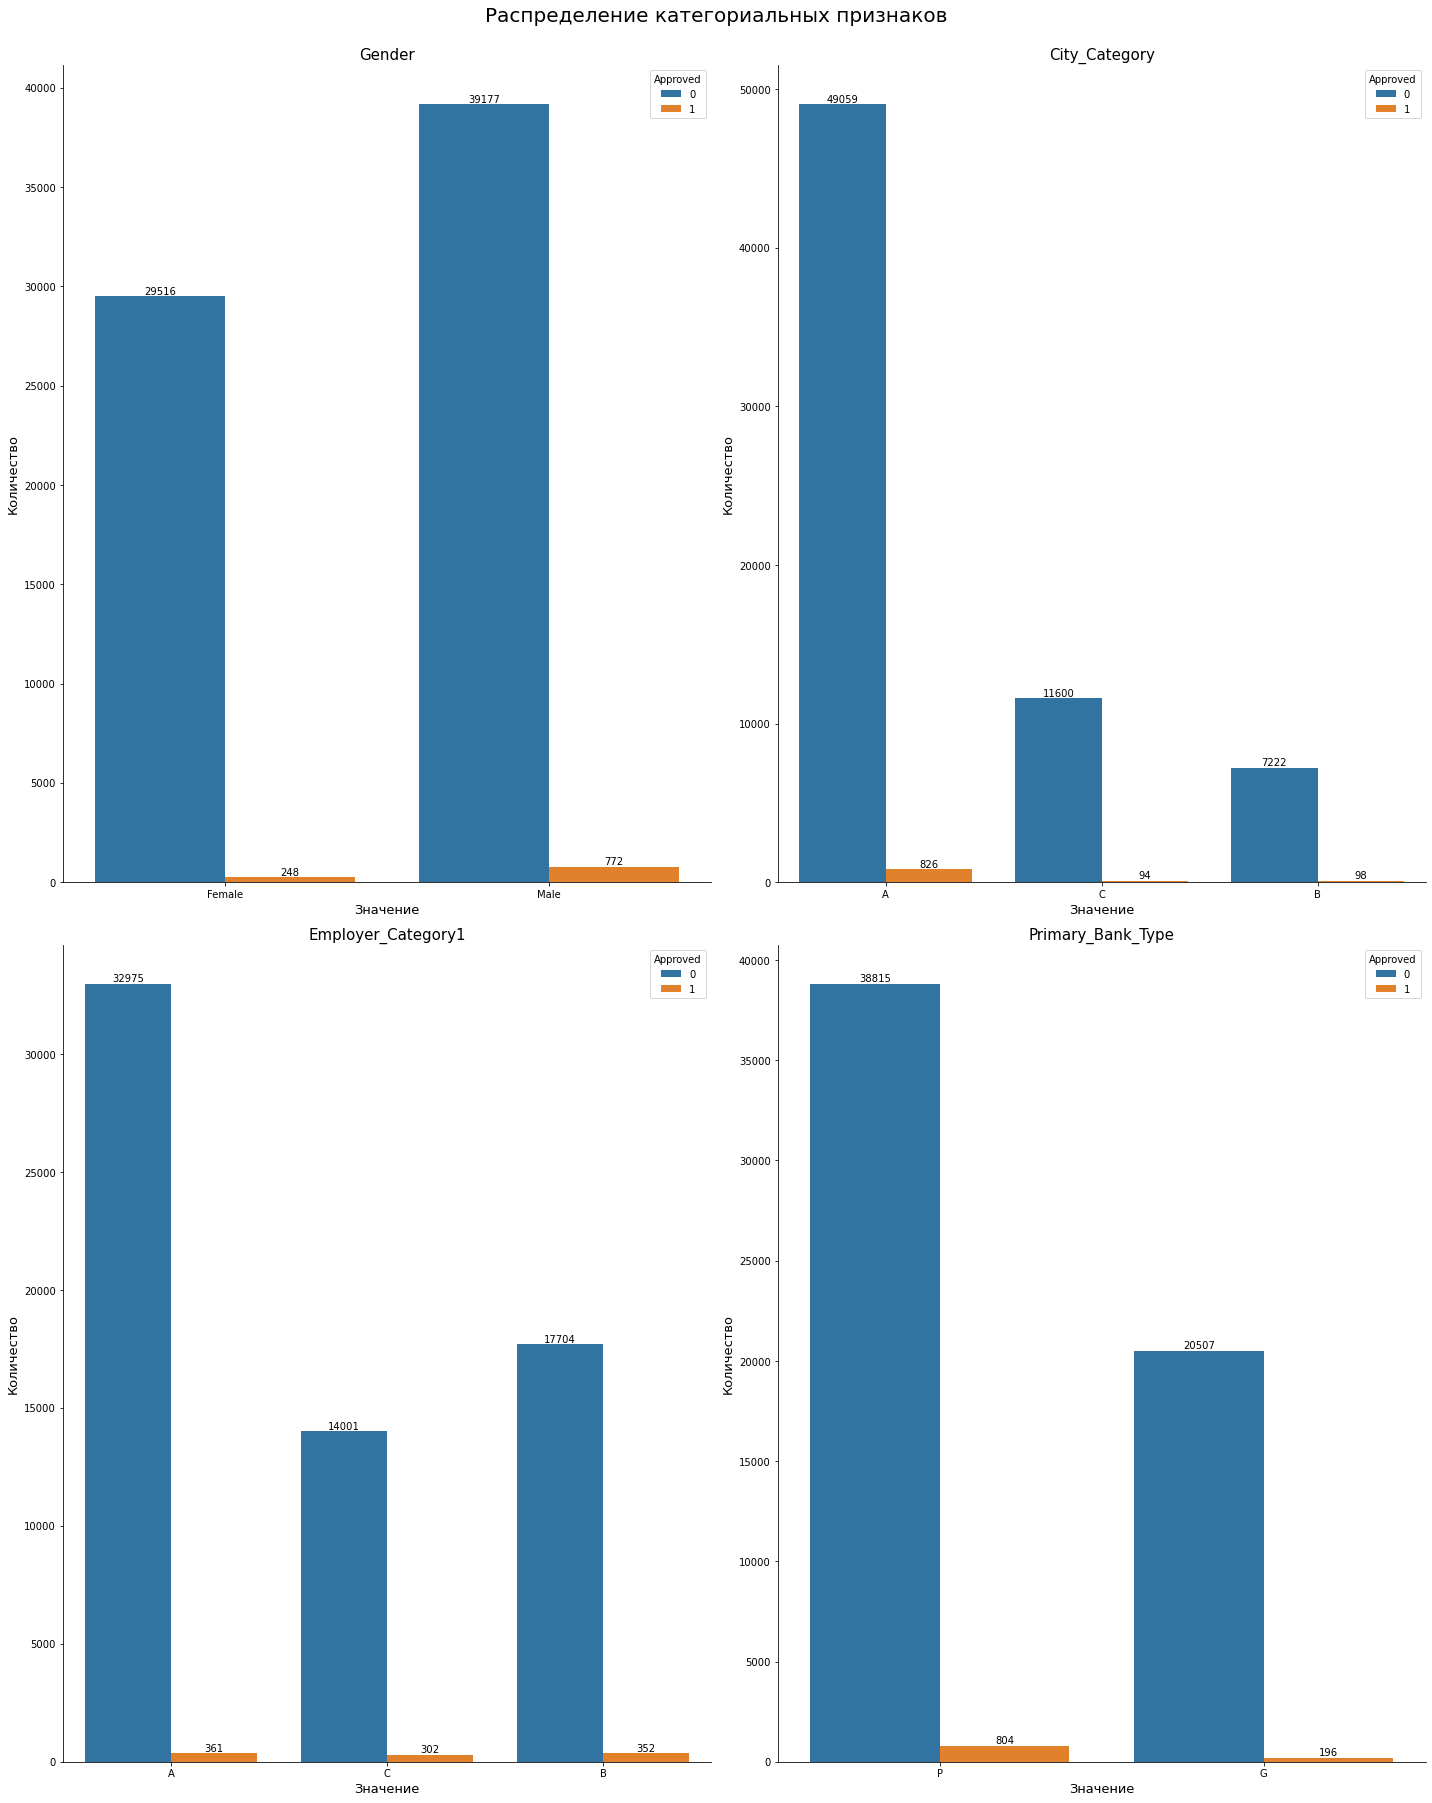

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 25))
plt.suptitle('Распределение категориальных признаков', y=1, fontsize=20)
for i in range(len(categorical_features[:4])):
    plot_categorical_feature(train,
                             categorical_features[i],
                             'Approved',
                             ax=axes[i // 2, i % 2],
                             label_fontsize=13,
                             title_fontsize=15)
plt.tight_layout()

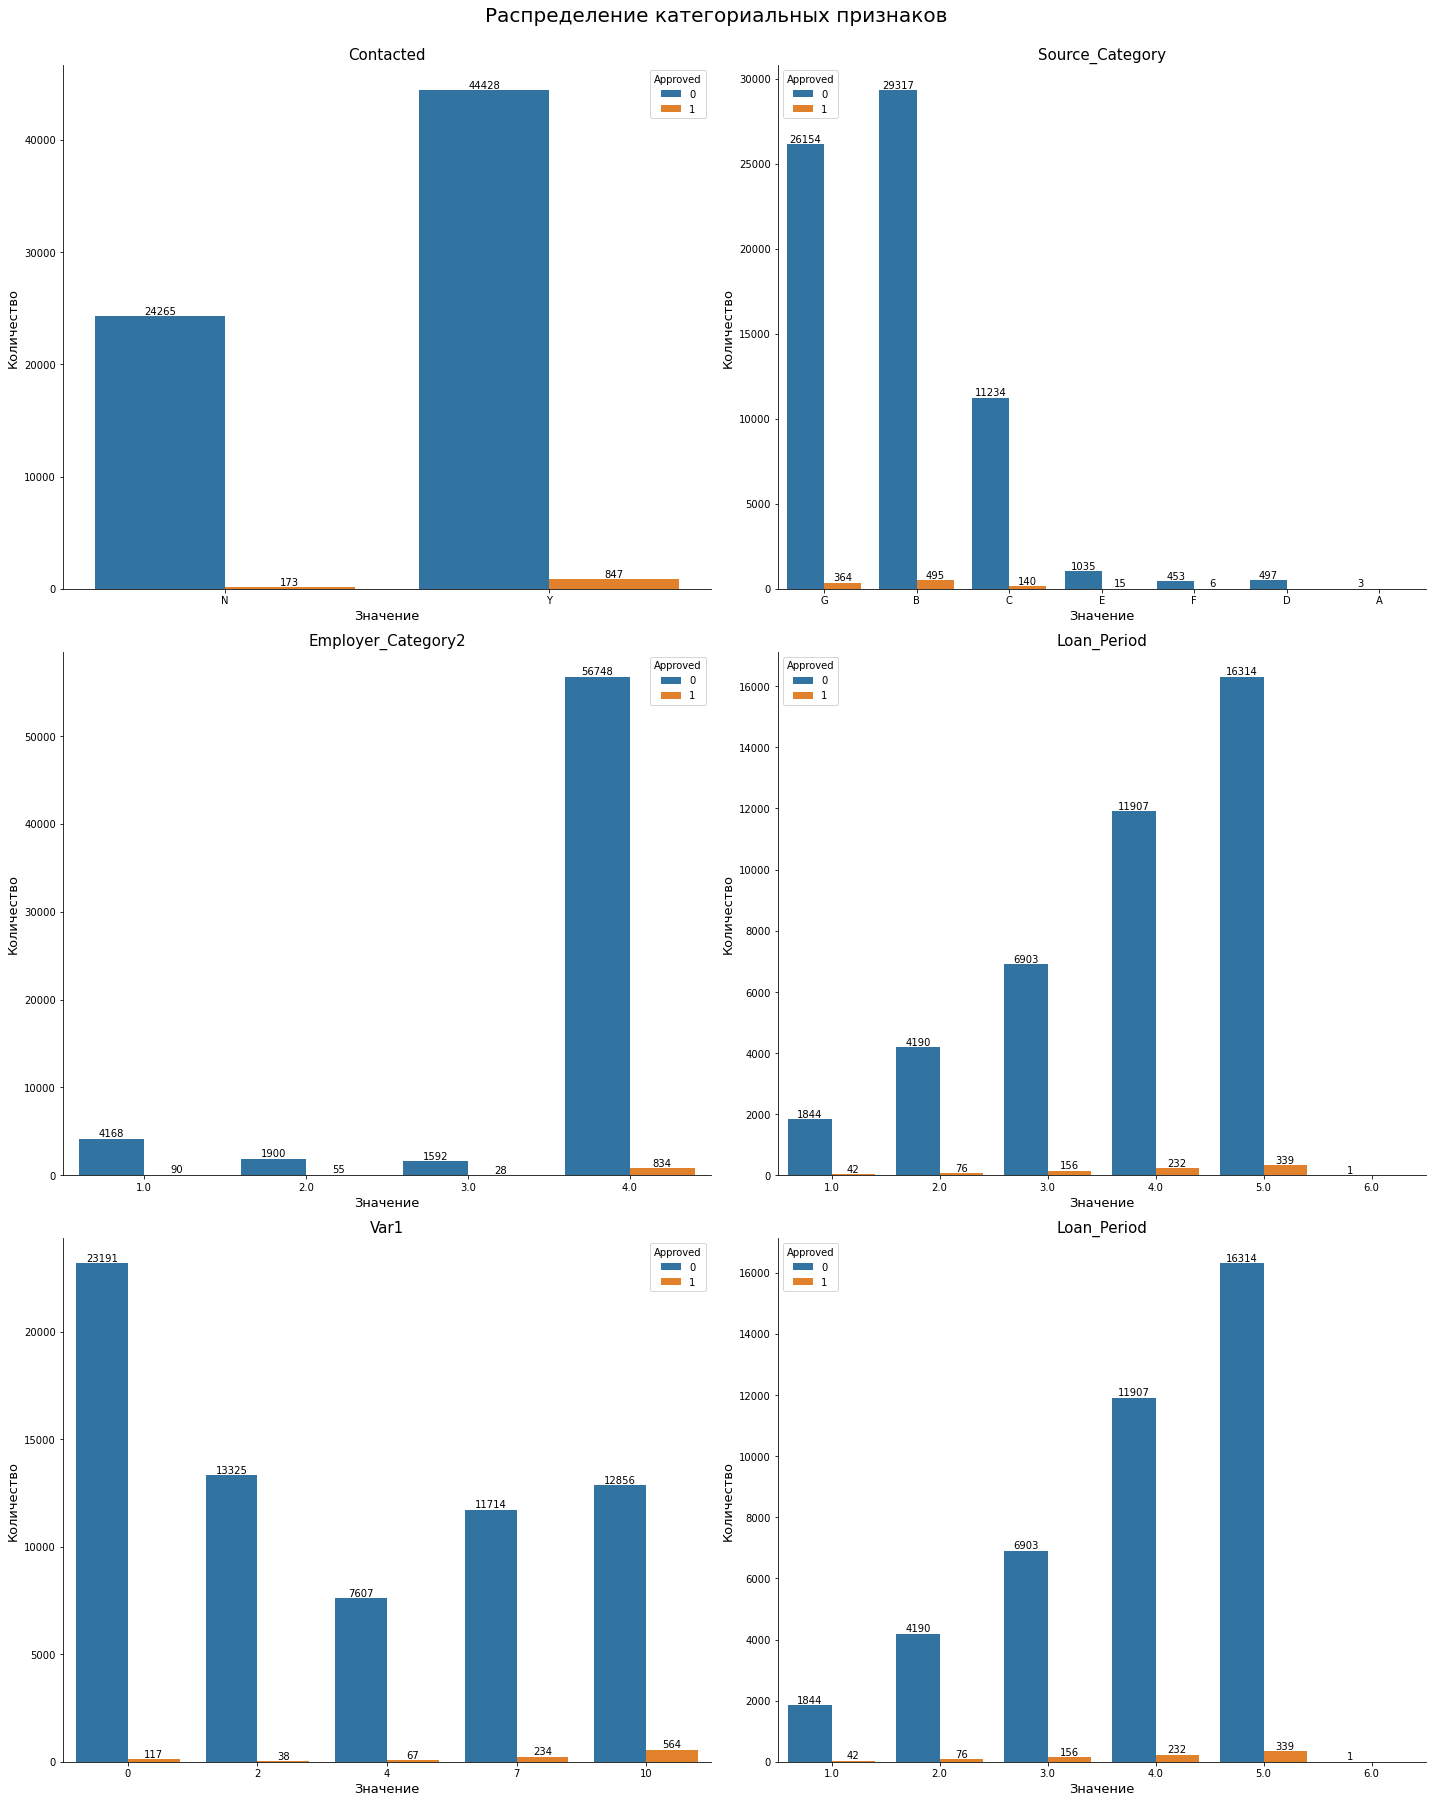

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
categorical_features = categorical_features[4:]
plt.suptitle('Распределение категориальных признаков', y=1, fontsize=20)
for i in range(len(categorical_features)):
    plot_categorical_feature(train,
                             categorical_features[i],
                             'Approved',
                             ax=axes[i // 2, i % 2],
                             label_fontsize=13,
                             title_fontsize=15)
plt.tight_layout()

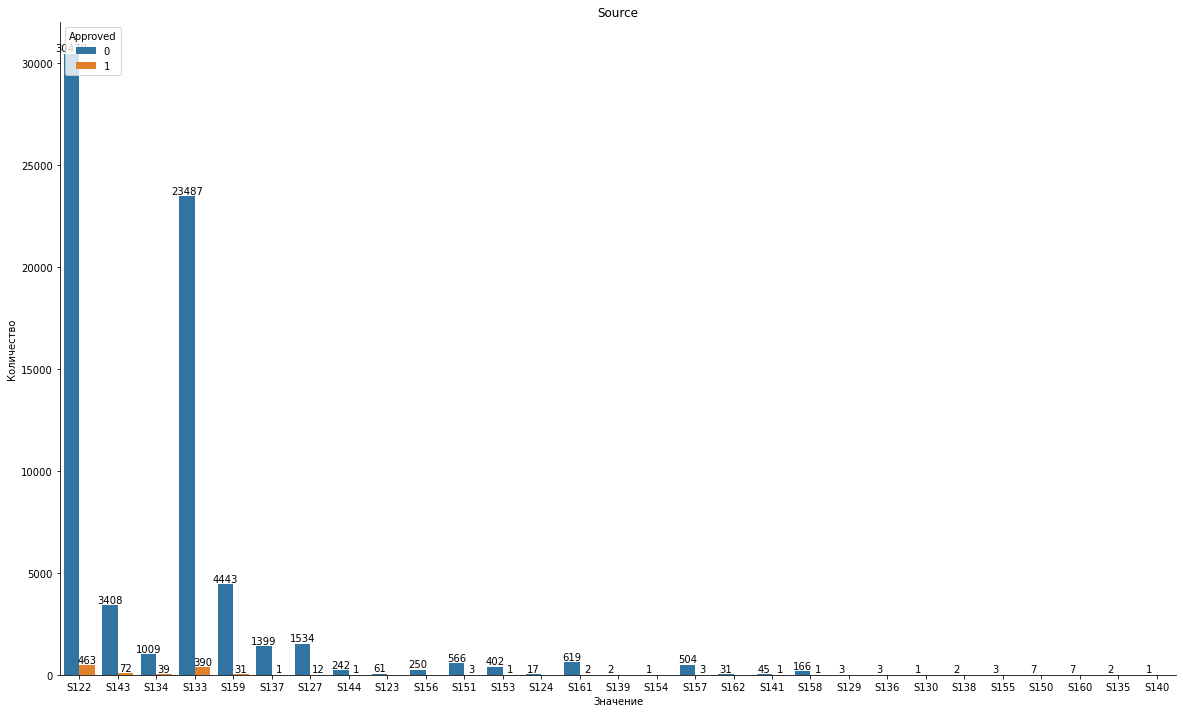

In [12]:
plot_categorical_feature(train, 'Source', 'Approved', figsize=(20, 12))

### Численные признаки

In [13]:
num_features = [
    'Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Interest_Rate', 'EMI'
]

In [14]:
describe_with_mode(train, num_features)

,Monthly_Income,Existing_EMI,Loan_Amount,Interest_Rate,EMI
count,6.971300e+04,69662.000000,42004.000000,22276.000000,22276.000000
mean,5.622283e+03,360.928751,39429.982859,19.213570,1101.466242
std,1.747671e+05,2288.517927,30727.595990,5.847136,752.661394
min,0.000000e+00,0.000000,5000.000000,11.990000,118.000000
25%,1.650000e+03,0.000000,20000.000000,15.250000,649.000000
50%,2.500000e+03,0.000000,30000.000000,18.000000,941.000000
75%,4.000000e+03,350.000000,50000.000000,20.000000,1295.000000
max,3.838384e+07,545436.500000,300000.000000,37.000000,13556.000000
nunique,5.010000e+03,3245.000000,196.000000,72.000000,2179.000000
mode,2.500000e+03,0.000000,10000.000000,20.000000,372.000000


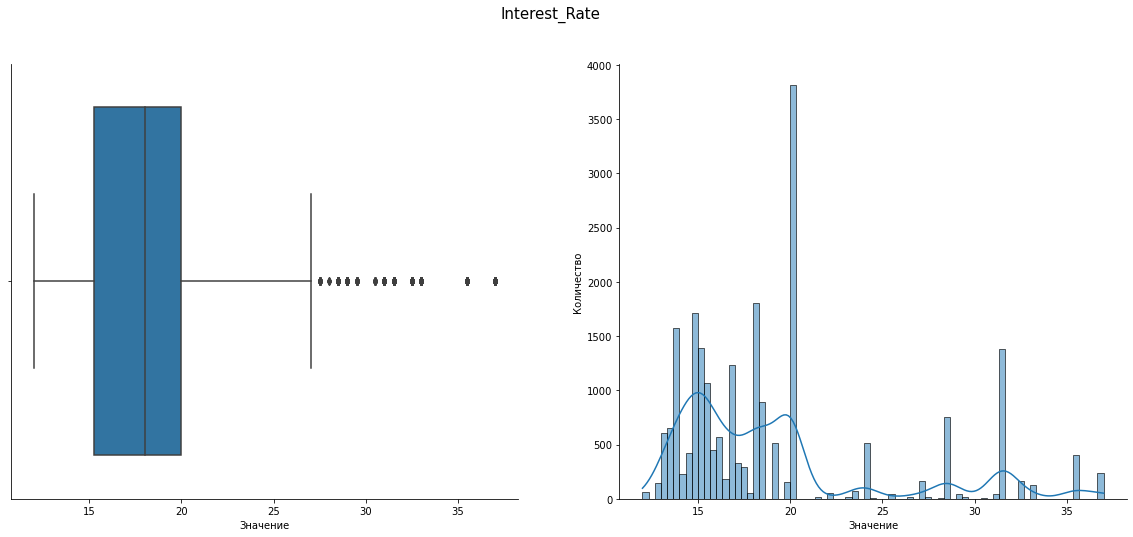

In [15]:
plot_numerical_feature(train, 'Interest_Rate')

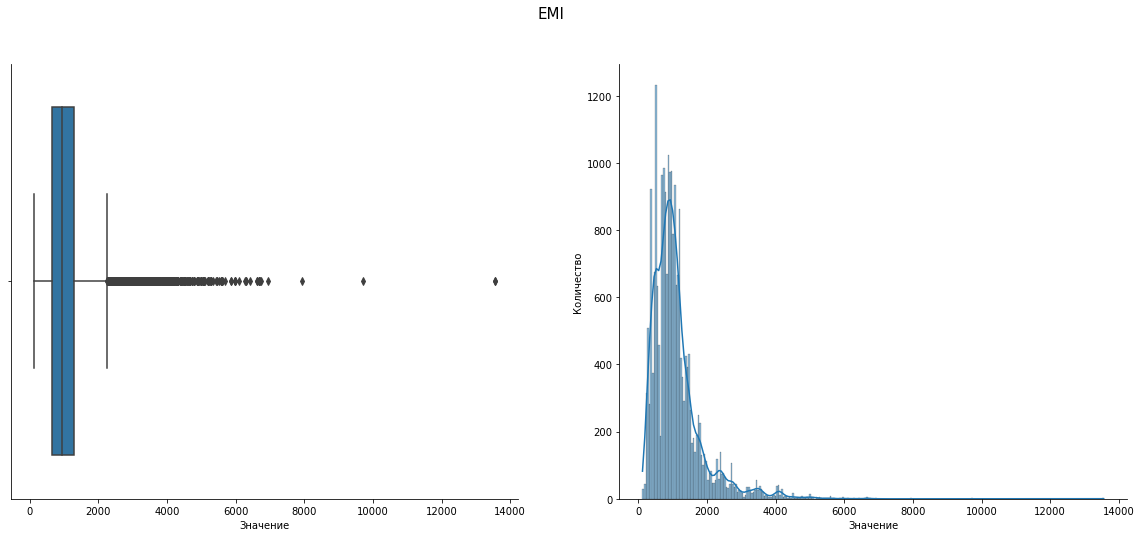

In [16]:
plot_numerical_feature(train, 'EMI')

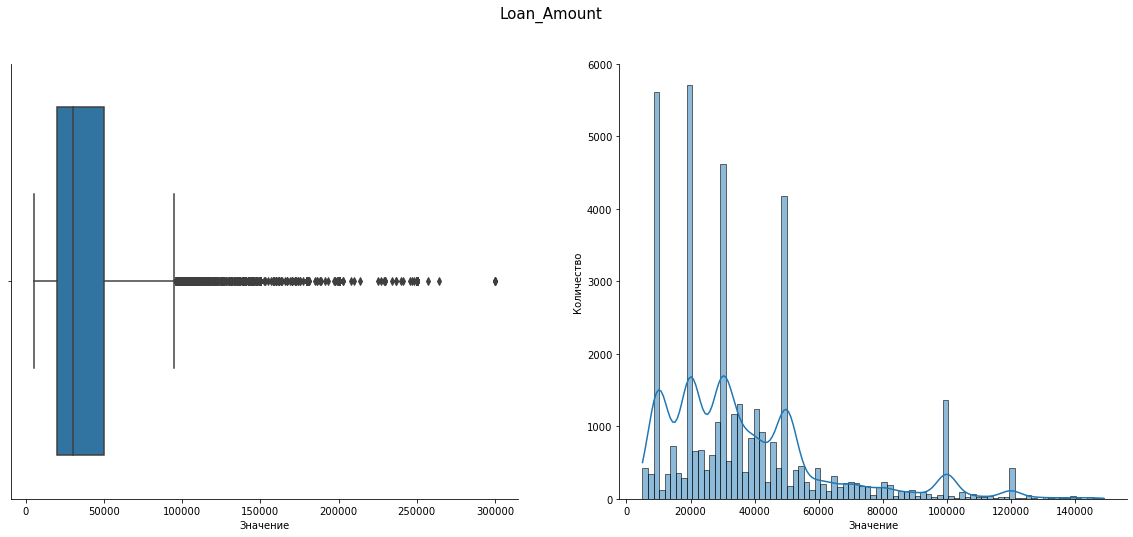

In [17]:
plot_numerical_feature(train, 'Loan_Amount', max_quantile=0.99)

* в численных признаках много выбросов